# Comparações de Algoritmos

Frequentemente precisamos comparar duas estratégias de resolução de um problema.
Essas comparações podem ser teóricas e computacionais.
Os dois aspectos mais importantes de comparação para métodos de otimização não-linear
são

  - O método converge?
  - Se sim, quão rápido?

Essas perguntas podem ser exploradas sob condições específicas (e normalmente são),
mas a ideia básica é essa.

## Método, Algoritmo, Implementação

Um aspecto importante da comparação é saber diferenciar o que é que você está
comparando. Esse detalhe muitas vezes é ignorado, supõe-se que despropositalmente,
o que acaba gerando conclusões parciais e subjetivas.

Um aspecto grandemente deixado de lado é qual a diferença entre método, algoritmo
e implementação. Vou definir os três e indicar de onde tirei cada definição.

  - **Método:** Um procedimento ou processo para obter um objetivo (Tradução livre do Merriam-Webster Online)
  - **Algoritmo:** Como um método mas com 5 características importantes:
    - Finitude (O método para de rodar)
    - Definição (Cada passo está bem definido)
    - Entrada
    - Saída
    - Eficiência (Cada passo deveria poder ser feito por um humano com lápis e papel em tempo finito)
    (Paráfrase de "The Art of Computer Programming, v.1" de Donald Knuth.)
  - **Implementação:** A realização física da tradução de um método ou algoritmo
    para uma linguagem de programação de maneira que o mesmo possa ser executado. (Eu)

É importante diferenciar aqui o método e o algoritmo, principalmente no âmbito da otimização.
A iteração de BFGS é um método. A atualização da matriz de BFGS é um algoritmo. O código que escrevemos é uma
implementação do método e do algoritmo.

Também é muito importante notar nós sempre queremos que o método seja um algoritmo, i.e.,
essencialmente queremos que o algoritmo pare.
Por exemplo,

  1. Dados $x_0 \in \mathbb{R}^n$ e $f:\mathbb{R}^n\rightarrow\mathbb{R}$
  2. Faça $k = 0$.
  3. Calcule $d^k = -\nabla f(x^k)$
  4. Calcule $\alpha_k = \arg\min_{\alpha > 0} f(x^k + \alpha d^k)$
  5. Faça $x^{k+1} = x^k + \alpha_k d^k$
  6. Faça $k = k + 1$.
  7. Se $\nabla f(x^k) = 0$ PARE com $x^* = x^k$.
       Senão, vá para o passo 3.

É um método, mas não um algoritmo, pois o algoritmo não acaba num número finito de iterações,
mesmo que a sequência seja convergente (por exemplo $f(x) = x_1^2 + 4x_2^2$ e $x^0 = (1,1)$).

Se mudamos a condição do passo 7 para $\Vert \nabla f(x^k)\Vert < 10^{-5}$,
ainda não temos um algoritmo, pois a sequência pode divergir (por exemplo $f(x) = -x^2$ e $x^0 = 1$).

Se mudamos a condição do passo 7 para $k > 1000$,
já chegamos bem perto de um algoritmo, se tudo é calculado corretamente, então $k$ chega a 1001.
Mas como o texto já diz, tudo precisa ser calculado corretamente. Isso quer dizer que $f$ é
diferenciável, e que a obtenção de $\alpha_k$ é possível. A primeira hipótese é trivial de
acrescentar, mas a segunda não, e também precisaríamos de alguma condição para ela.

Essas pequenas mudanças e variações são aquelas que fizemos no começo, para que o algoritmo parasse.
Algumas delas ignoramos, pois supomos que o método estaria funcionando. Mas se formos ser
estritos, precisamos nos preocupar com algumas coisas, como se o parâmetro da busca linear de Armijo
será suficientemente positivo, ou o raio da região de confiança, ou se Pred > 0, etc.
Nesses pontos é que é importante a teoria. Pois se provamos matematicamente que algo é possível sob
algumas hipóteses, podemos restringir nossas comparações à essas hipóteses, e colocar salva-guardas
caso elas falhem.

O algoritmo é a implementação de alguma ideia. O problema, como você pode notar, é que a ideia
nunca está sozinha. Dessa maneira, ao implementar o método de BFGS para as direções, também
implementamos a atualização de BFGS e a solução do sistema linear.
Ao comparar dois *métodos*, é preciso estar atento ao algoritmo em si, isto é, quais as condições
de parada embutidas, e também às implementações, e.g., como são resolvidos os sistemas lineares.
A atenção tem que ser redobrada ainda, pois não necessariamente o autor do livro ou artigo que você
está lendo está fazendo essa distinção.

## Comparando

Alguns problemas são facilmente resolvidos. Por exemplo, dado um vetor, como podemos ordená-lo?
Existem vários algoritmos que fazer essa tarefa, e para compará-los basta ver qual leva mais tempo,
ou mais iterações, pois são métricas mais ou menos equivalentes.
No entanto, na comparação de métodos de otimização, já começamos com o problema de se **o método
funciona** para o problema.

Como vimos, por exemplo, o método de Newton falha se encontrar uma hessiana indefinida ou singular.
Os outros métodos também podem falhar, em condições parecidas. Então, já não temos a garantia de que
o método funciona. Então, um parâmetro de comparação entre os métodos seria se eles convergem para
uma determinada seleção de problemas.

Isso não é suficiente, no entanto. Pois, também como vimos, o método de Newton é muito mais rápido
que o método do gradiente, em vários casos. Então, para os casos onde ele funciona, ele é mais
eficiente. Esse é outro parâmetro de comparação.

A questão agora é, qual é mais importante.

 - O método A resolve os problemas 80% mais rápido que o método B
 - O método B resolve 80% problemas a mais que o método A

Qual é melhor? E se no lugar de 80% tivermos 10%?

Essa pergunta depende de vários fatores e é subjetiva, então vamos fazer uma análise olhando para
várias possibilidades de **robustez** e **eficiência**. Essa análise será feita com o perfil de
desempenho (performance profile).

## Perfil de desempenho

Vamos considerar um conjunto $\mathcal{S}$ de algoritmos (ou métodos, ou implementações), e um
conjunto $\mathcal{P}$ de problemas que serão usados na comparação desses algoritmos.
Definimos como $t_{s,p}$ o tempo (ou número de avaliações de função, ou iterações, ou custo, etc.)
que o algoritmo $s$ leva para resolver o problema $p$.
Caso o algoritmo $s$ não consiga resolver o problema $p$, definimos $t_{s,p} = t_{\max}$,
de maneira que $t_{s,p} < t_{\max}$ para todo $s$ e $p$.

Definimos a razão de desempenho
$$ r_{s,p} = \frac{t_{s,p}}{\min{t_{s,p}}}, $$
que servirá para comparar os custos sem depender da escala de tempo.
Note que é necessário que $t_{s,p} > 0$, o que é natural, e também que
$r_{s,p} \geq 1$. Definimos $r_M > 0$ como o valor tal que
$r_{s,p} < r_M$.

Definimos
$$ \rho_s(\tau) = \frac{1}{N_P}\#\{p \in \mathcal{P} \mid r_{s,p} \leq \tau\}, $$
um tipo de distribuição acumulada do algoritmo $s$, que indica quando problemas o algoritmo $s$
consegue resolver com razão de desempenho até $\tau$.

O gráfico de perfil de desempenho consiste dos gráficos das funções $\rho_s$ para cada $s$. O valor
$\rho_s(1)$ indica quantos problemas o algoritmo $s$ consegue resolver tão rápido quanto o melhor
algoritmo, e o valor $$\lim_{\tau\rightarrow r_M^-} \rho_{s}$$
é a quantidade total de problemas que $s$ resolve. Esses valores são ditos eficiência e robustez,
respectivamente.

### Exemplo

Vamos simular três algoritmos.

In [7]:
# 10 problemas
NP = 10
# Função pra criar aleatório
rnd() = round(rand(NP)+0.01,2)
# Tempos que os algoritmos levaram
A = rnd(); B = rnd(); C = rnd();

In [9]:
@printf("%4s %6s %6s %6s\n", "Prob", "Alg A", "Alg B", "Alg C")
for i = 1:NP
    @printf("%4d %6.3f %6.3f %6.3f\n", i, A[i], B[i], C[i])
end

Prob  Alg A  Alg B  Alg C
   1  0.060  0.940  0.390
   2  0.520  0.450  0.390
   3  0.140  0.650  0.070
   4  0.850  0.610  0.660
   5  0.430  0.680  0.710
   6  0.450  0.590  0.110
   7  0.610  1.000  0.760
   8  0.320  0.350  0.630
   9  0.320  0.590  0.950
  10  0.320  0.460  0.030


In [12]:
@printf("%4s %9s %9s %9s\n", "Prob", "Alg A", "Alg B", "Alg C")
for i = 1:NP
    @printf("%4d %9.2e %9.2e %9.2e\n", i, A[i], B[i], C[i])
end

Prob     Alg A     Alg B     Alg C
   1  6.00e-02  9.40e-01  3.90e-01
   2  5.20e-01  4.50e-01  3.90e-01
   3  1.40e-01  6.50e-01  7.00e-02
   4  8.50e-01  6.10e-01  6.60e-01
   5  4.30e-01  6.80e-01  7.10e-01
   6  4.50e-01  5.90e-01  1.10e-01
   7  6.10e-01  1.00e+00  7.60e-01
   8  3.20e-01  3.50e-01  6.30e-01
   9  3.20e-01  5.90e-01  9.50e-01
  10  3.20e-01  4.60e-01  3.00e-02


In [14]:
# Os menores valores

MIN = [minimum([A[i];B[i];C[i]]) for i = 1:NP];
MIN

10-element Array{Any,1}:
 0.06
 0.39
 0.07
 0.61
 0.43
 0.11
 0.61
 0.32
 0.32
 0.03

In [17]:
# As razões
RA = A./MIN; RB = B./MIN; RC = C./MIN
@printf("%4s %9s %9s %9s\n", "Prob", "r_A", "r_B", "r_C")
for i = 1:NP
    @printf("%4d %9.2f %9.2f %9.2f\n", i, RA[i], RB[i], RC[i])
end

Prob       r_A       r_B       r_C
   1      1.00     15.67      6.50
   2      1.33      1.15      1.00
   3      2.00      9.29      1.00
   4      1.39      1.00      1.08
   5      1.00      1.58      1.65
   6      4.09      5.36      1.00
   7      1.00      1.64      1.25
   8      1.00      1.09      1.97
   9      1.00      1.84      2.97
  10     10.67     15.33      1.00


In [27]:
# As funções são mais complicadas
T = zeros(NP, 3);
T[:,1] = RA; T[:,2] = RB; T[:,3] = RC; # Cada linha é um problema
ρA(τ) = sum(RA .<= τ)/NP # Gambiarras. Se for ≦ dá 1
ρB(τ) = sum(RB .<= τ)/NP # Soma os 1
ρC(τ) = sum(RC .<= τ)/NP # Obtém o resultado

ρC (generic function with 1 method)

In [31]:
using Plots
pyplot()

Plots.PyPlotBackend()


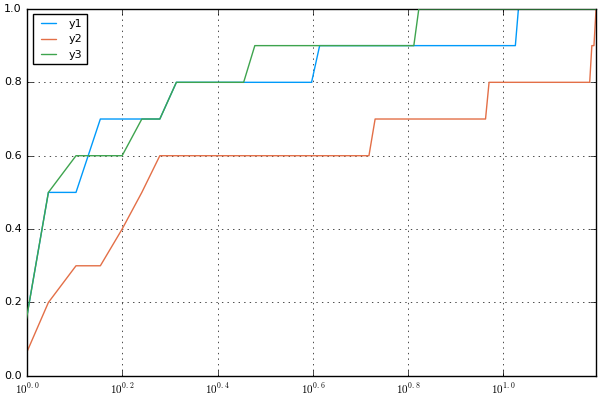

In [48]:
plot(ρA, 0, maximum(T))
plot!(ρB, 0, maximum(T))
plot!(ρC, 0, maximum(T))
xlims!(1, maximum(T))
xaxis!(:log)


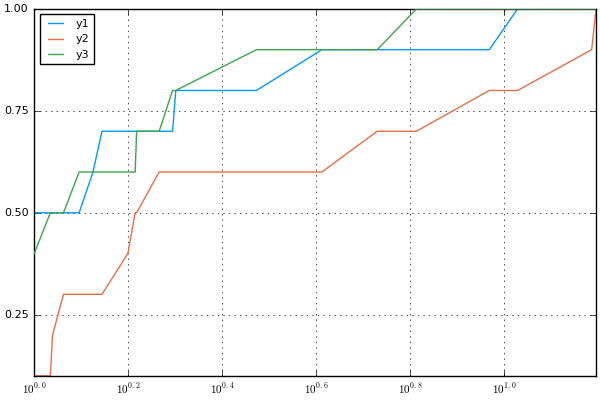

In [49]:
t = sort(T[:])
plot(t, [ρA(x) for x in t])
plot!(t, [ρB(x) for x in t])
plot!(t, [ρC(x) for x in t])
xlims!(1, maximum(T))
xaxis!(:log)


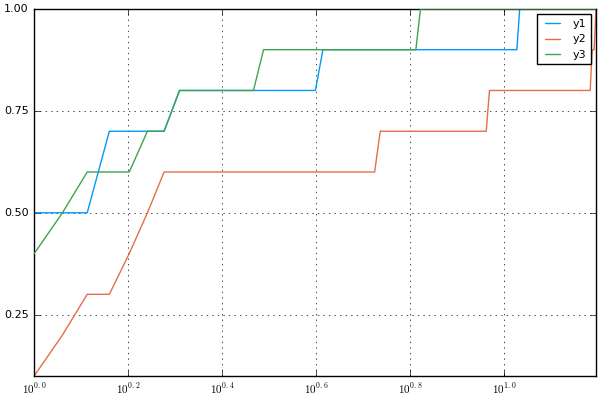

In [50]:
t = linspace(1, maximum(T), 100)
plot(t, [ρA(x) for x in t])
plot!(t, [ρB(x) for x in t])
plot!(t, [ρC(x) for x in t])
xlims!(1, maximum(T))
xaxis!(:log)


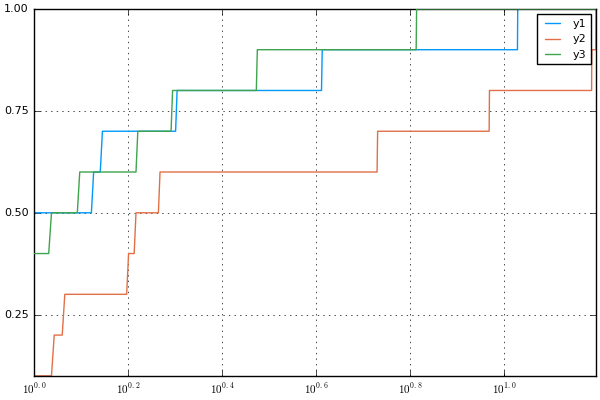

In [52]:
t = linspace(1, maximum(T), 1000)
plot(t, [ρA(x) for x in t])
plot!(t, [ρB(x) for x in t])
plot!(t, [ρC(x) for x in t])
xlims!(1, maximum(T))
xaxis!(:log)

## Analisando

Os resultados são aleatório, então vamos analisar de maneira geral.
O algoritmo mais acima é melhor. O mais acima à esquerda é o mais
eficiente, isto é, aquele que resolve os problemas mais rápido que os outros.
O mais acima à direta é o mais robusto, isto é, aquele que resolve
mais problemas. Note que neste caso todos convergem par todos os problemas.

Na abscissa, temos a razão com qual o algoritmo converge, e o valor
da função nesse ponto quer dizer "dado x vezes mais tempo que o melhor
algoritmo, quantos problemas o algoritmo resolve".
Parece um pouco complicado de entender, mas a ideia é a seguinte.
O algoritmo A tem os tempos [1s 2s 10s], e o B tem os tempos
[2s 3s 12s].
Então, o algoritmo A é o melhor e resolve 3 problemas no instante inicial.
Para $\tau = 1$, o algoritmo B resolveu 0 problemas. Matematicamente,
as razões de B são [2 1.5 1.2], então a função acumulada é 0.

Para $\tau = 1.2$, queremos saber quantos problemas o algoritmo em
até 20% do melhor algoritmo. Os melhores tempos são [1s 2s 10s],
e 20% a mais disso seria [1.2s 2.4s 12s]. Vemos que B consegue
resolver o terceiro problemas em 12s, então a função acumulada pega esse valor.
Em até 50% a mais de tempo, o algoritmo B resolve 2 problemas, e em até
o dobro do tempo, o algoritmo B resolve 3 problemas.


## Gerando o performance profile

Como vimos no exemplo, não é muito fácil gerar o performance profile, e portanto,
desde que foi inventado, várias pessoas fizeram códigos que geram esse gráfico
para o usuário.

Eu recomendo o [perprof-py](https://github.com/ufpr-opt/perprof-py), que
eu ajudei a implementar. Para esse software, devemos providenciar os resultados
dos algoritmos em arquivos de texto em formato de tabela.

Um novo pacote, nativo do Julia para isso é o [Profiles.jl](https://github.com/JuliaSmoothOptimizers/Profiles.jl).

# Pacotes de Testes

- [NLPModels.jl](https://github.com/JuliaSmoothOptimizers/NLPModels.jl)
- [CUTEst.jl](https://github.com/JuliaSmoothOptimizers/CUTEst.jl)
- [OptimizationProblems.jl](https://github.com/JuliaSmoothOptimizers/OptimizationProblems.jl)